In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R
import pandas as pd

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad'
adata=sc.read(adata_file)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2129 × 31433
    obs: 'ground_truth'
    obsm: 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


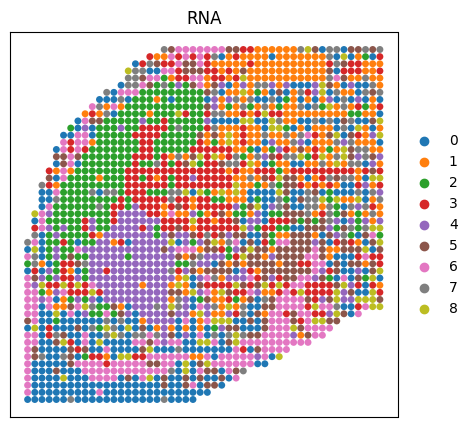

In [10]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/'
adata_omics1 = sc.read_h5ad(file_fold + 'RNA.h5ad')
print(adata_omics1)

sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)

adata_hvg = adata_omics1[:, adata_omics1.var['highly_variable']]
sc.tl.pca(adata_omics1, n_comps=50)
sc.pp.neighbors(adata_omics1, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics1, resolution=1)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/RNA.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


AnnData object with n_obs × n_vars = 2129 × 24333
    obs: 'ground_truth'
    obsm: 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


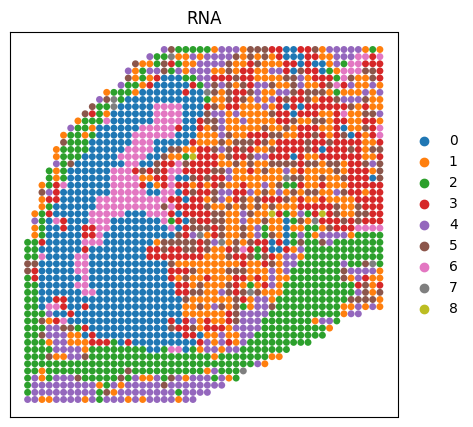

In [14]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/'
adata_omics2 = sc.read_h5ad(file_fold + 'ATAC.h5ad')
print(adata_omics2)

sc.pp.filter_genes(adata_omics2, min_cells=10)
sc.pp.highly_variable_genes(adata_omics2, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics2, target_sum=1e4)
sc.pp.log1p(adata_omics2)

adata_hvg = adata_omics2[:, adata_omics2.var['highly_variable']]
sc.tl.pca(adata_omics2, n_comps=50)
sc.pp.neighbors(adata_omics2, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics2, resolution=1.45)

custom_colors = [
  '#7da494',  # Gold
  '#dba0c1',  # BlueViolet
  '#9f8db8',  # qianzi
  '#d0d08a',  # Blue
  '#abc8e5',  # molv
  '#e5a79a',  # tufen
]
adata_omics2.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/ATAC.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [15]:
adata.obs['RNA']=adata_omics1.obs['leiden']
print(adata)
adata.obs['ATAC']=adata_omics2.obs['leiden']
print(adata)
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad'
adata.write(adata_file)

AnnData object with n_obs × n_vars = 2129 × 20714
    obs: 'ground_truth', 'mclust', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'annotation', 'RNA'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_9_colors', 'MISO_rp_9_colors', 'RNA_colors', 'Seurat_9_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_13_colors', 'SpatialGlue_14_colors', 'SpatialGlue_15_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'no_image_colors', 'resnet_colors'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'adj_feature', 'alpha', 'alpha_omics1', 'alpha_omics2', 'emb_latent_omics1', 'emb_latent_omics2',

In [16]:
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/"

cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/none_E18_5_0.5_0.1_0.6_10_mclust_DMG_embedding_mclust9.csv')
adata.obs['no_image'] = cluster['mclust'].values
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/resnet_v2_E18_5_0.7_0.1_0.9_10_mclust_DMG_embedding_mclust9.csv')
adata.obs['resnet'] = cluster['mclust'].values
adata.write(adata_file)

In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2129 × 20714
    obs: 'ground_truth', 'mclust', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'annotation', 'RNA', 'ATAC', 'no_image', 'resnet', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'MISO_rp_12', 'MISO_rp_13', 'MISO_rp_14', 'MISO_rp_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_9_colors', 'MISO_rp_9_colors', 'RNA_colors', 'Seurat_9_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_13_colors', 'SpatialGlue_14_colors', 'SpatialGlue_15_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 

In [3]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad'
adata=sc.read(adata_file)
custom_colors = [
    
    '#D0D1CD',
    '#669999',
    '#D6608A',
    '#E8A16D',
    '#8F9D27',  
    '#49A836', 
    '#957EB2',  
    '#E17065',
     
    '#23A9AD', 
    '#DD5D6A',
    '#4D5BA0', 
    
    '#40AE91',
    
]

# # 为两个数据集设置相同的颜色映射
# adata.uns['RNA_cluster_colors'] = custom_colors
# adata.uns['ADT_cluster_colors'] = custom_colors
# adata.uns['Seurat_colors'] = custom_colors

adata.uns['SpatialGlue_9_colors'] = custom_colors
adata.uns['SpatialGlue_10_colors'] = custom_colors
adata.uns['SpatialGlue_11_colors'] = custom_colors
adata.uns['SpatialGlue_12_colors'] = custom_colors
adata.uns['SpatialGlue_13_colors'] = custom_colors
adata.uns['SpatialGlue_14_colors'] = custom_colors
adata.uns['SpatialGlue_15_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['Seurat_9_colors'] = custom_colors
adata.uns['MISO_9_colors'] = custom_colors
adata.uns['MISO_rp_9_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
# adata.write(adata_file)

In [4]:
#adata.obs['Seurat'] = adata.obs['Seurat'].astype('category')
adata.obs['SpatialGlue_9'] = adata.obs['SpatialGlue_9'].astype('category')
adata.obs['SpatialGlue_10'] = adata.obs['SpatialGlue_10'].astype('category')
adata.obs['SpatialGlue_11'] = adata.obs['SpatialGlue_11'].astype('category')
adata.obs['SpatialGlue_12'] = adata.obs['SpatialGlue_12'].astype('category')
adata.obs['SpatialGlue_13'] = adata.obs['SpatialGlue_13'].astype('category')
adata.obs['SpatialGlue_14'] = adata.obs['SpatialGlue_14'].astype('category')
adata.obs['SpatialGlue_15'] = adata.obs['SpatialGlue_15'].astype('category')
adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['resnet'] = adata.obs['resnet'].astype('category')
adata.obs['MISO_9'] = adata.obs['MISO_9'].astype('category')
adata.obs['MISO_rp_9'] = adata.obs['MISO_rp_9'].astype('category')
adata.obs['MISO_12'] = adata.obs['MISO_12'].astype('category')
adata.obs['MISO_rp_12'] = adata.obs['MISO_rp_12'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
#adata.obs['Seurat_9'] = adata.obs['Seurat_9'].astype('category')
#adata.write(adata_file)

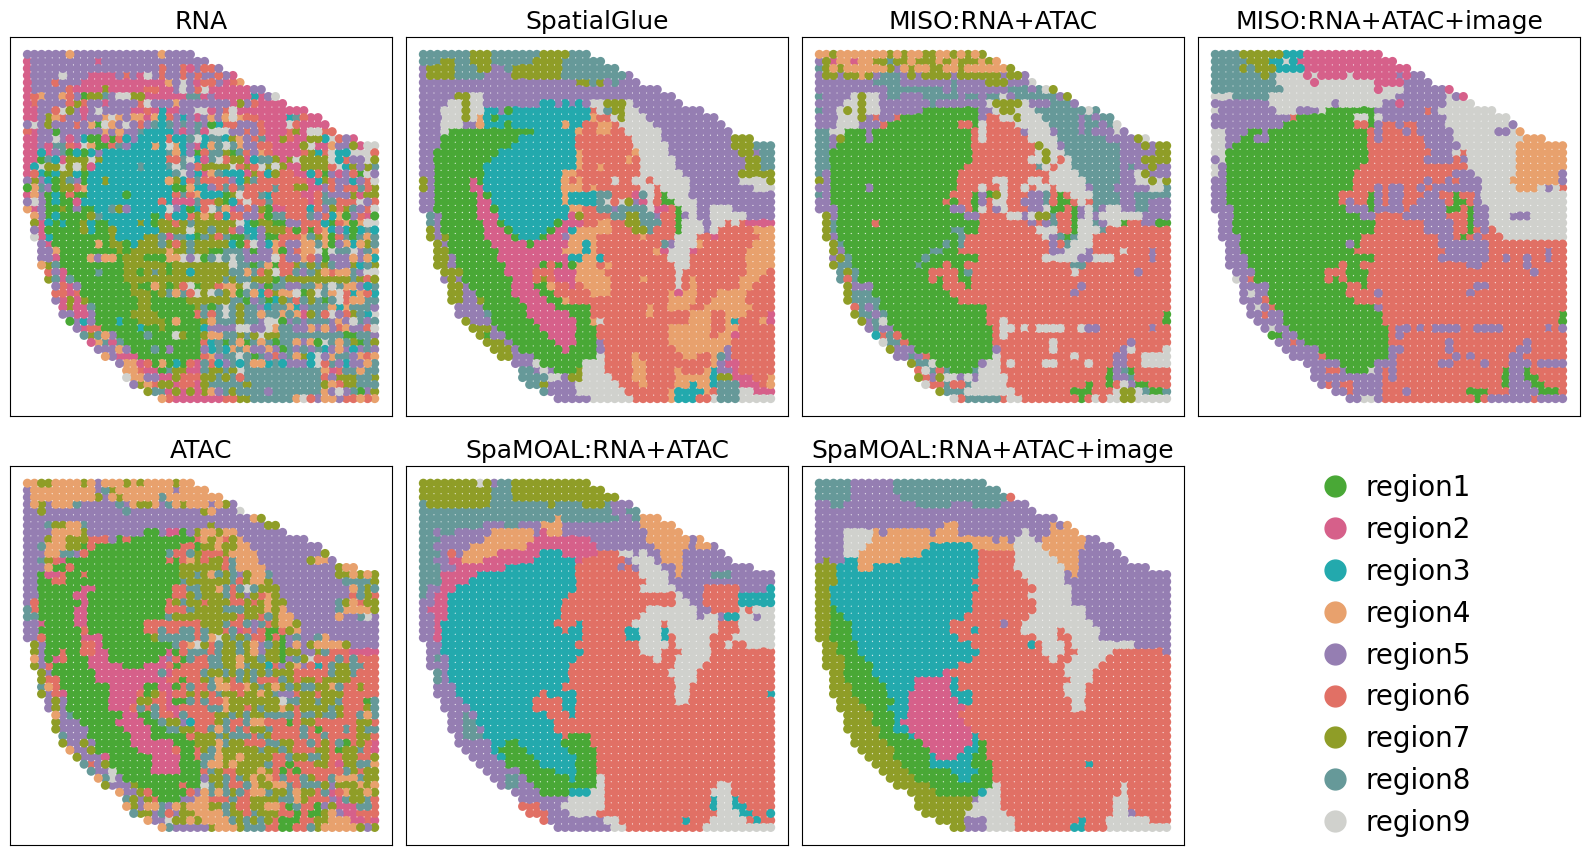

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings

# 阻止所有警告信息
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2,4, figsize=(16,9))  #(7, 4)
s_size = 170
#sc.pl.embedding(adata, basis='spatial', color='annotation',title='Ground truth', ax=ax_list[1,3],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_9', title='SpatialGlue',ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_rp_9', title='MISO:RNA+ATAC',ax=ax_list[0,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_9', title='MISO:RNA+ATAC+image',ax=ax_list[0,3],s=s_size, show=False)

sc.pl.embedding(adata, basis='spatial', color='ATAC', ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image',title='SpaMOAL:RNA+ATAC', ax=ax_list[1,1], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='resnet', title='SpaMOAL:RNA+ATAC+image',ax=ax_list[1,2], s=s_size,show=False)

# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        ax.invert_yaxis()

# 创建自定义图例

custom_legend = {
    
    # 'region1':'#D0D1CD',
    # 'region2':'#669999',
    # 'region3':'#D6608A',
    # 'region4':'#E8A16D',
    # 'region5':'#8F9D27',  
    # 'region6':'#49A836', 
    # 'region7':'#957EB2',  
    # 'region8':'#E17065',
    # 'region9':'#23A9AD', 
    'region1':'#49A836',
    'region2':'#D6608A',
    'region3':'#23A9AD',
    'region4':'#E8A16D',
    'region5':'#957EB2',  
    'region6':'#E17065', 
    'region7':'#8F9D27',  
    'region8':'#669999',
    'region9':'#D0D1CD', 
}

# 创建带小圆点的自定义图例
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,  # 标记点大小
        label=label
    )
    for label, color in custom_legend.items()
]

# 在特定子图上添加自定义图例

ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)
plt.tight_layout(w_pad=1)
#plt.tight_layout(h_pad=0.1)
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/'
plt.savefig(file_fold + 'cluster_all.png',format='png')
plt.show()


In [22]:
import pandas as pd
import scanpy as sc

list_RNA = ['8','1','6','7','3','2','0','5','4']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)
list_ATAC = ['7','5','6','4','1','0','2','3','8']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)


list_resnet = [1,2,9,6,7,5,8,4,3]
adata.obs['resnet']  = pd.Categorical(adata.obs['resnet'], 
                      categories=list_resnet,
                      ordered=True)
list_no_image = [1,6,7,2,8,9,3,4,5]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)

list_SpatialGlue_9 = [9,2,5,6,7,4,8,1,3]
adata.obs['SpatialGlue_9']  = pd.Categorical(adata.obs['SpatialGlue_9'], 
                      categories=list_SpatialGlue_9,
                      ordered=True) 
list_MISO_rp_9 = [0,1,6,4,3,2,8,5,7]
adata.obs['MISO_rp_9']  = pd.Categorical(adata.obs['MISO_rp_9'], 
                      categories=list_MISO_rp_9,
                      ordered=True)
list_MISO_9 = [8,3,1,6,7,4,2,0,5]
adata.obs['MISO_9']  = pd.Categorical(adata.obs['MISO_9'], 
                      categories=list_MISO_9,
                      ordered=True)                        
# list_annotation = [5,6,2,3,1,4,0,8,10,9,7,11]
# adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
#                       categories=list_annotation,
#                       ordered=True)  


                  
              
#adata.write(adata_file)


In [35]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 定义要评估的所有聚类结果列名
cluster_columns = [
    'SpatialGlue_9',
    'MISO_rp_9', 
    'MISO_9',
    'no_image',
    'resnet'
]

# 初始化结果字典
metrics_results = {}

# 计算每个聚类结果的指标
for col in cluster_columns:
    predicted_labels = adata.obs[col].values
    
    metrics_results[col] = {
        'AMI': AMI(true_labels, predicted_labels),
        'NMI': NMI(true_labels, predicted_labels),
        'ARI': ARI(true_labels, predicted_labels),
        'Homogeneity': homogeneity_score(true_labels, predicted_labels),
        'V-measure': v_measure_score(true_labels, predicted_labels),
        'Mutual Information': mutual_info_score(true_labels, predicted_labels)
    }

# 打印表头
print("Method\t\tAMI\t\tNMI\t\tARI\t\tHomogeneity\tV-measure\tMutual Info")
print("-"*90)

# 打印每个方法的结果
for method, metrics in metrics_results.items():
    print(f"{method:<15}", end="")
    for metric_name in ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']:
        print(f"{metrics[metric_name]:.4f},\t", end="")
    print()  # 换行

Method		AMI		NMI		ARI		Homogeneity	V-measure	Mutual Info
------------------------------------------------------------------------------------------
SpatialGlue_9  0.5449,	0.5496,	0.4438,	0.5464,	0.5496,	1.1499,	
MISO_rp_9      0.4550,	0.4604,	0.4371,	0.4148,	0.4604,	0.8729,	
MISO_9         0.4247,	0.4313,	0.3751,	0.3822,	0.4313,	0.8044,	
no_image       0.4479,	0.4541,	0.4556,	0.4208,	0.4541,	0.8856,	
resnet         0.5005,	0.5059,	0.5030,	0.4798,	0.5059,	1.0097,	


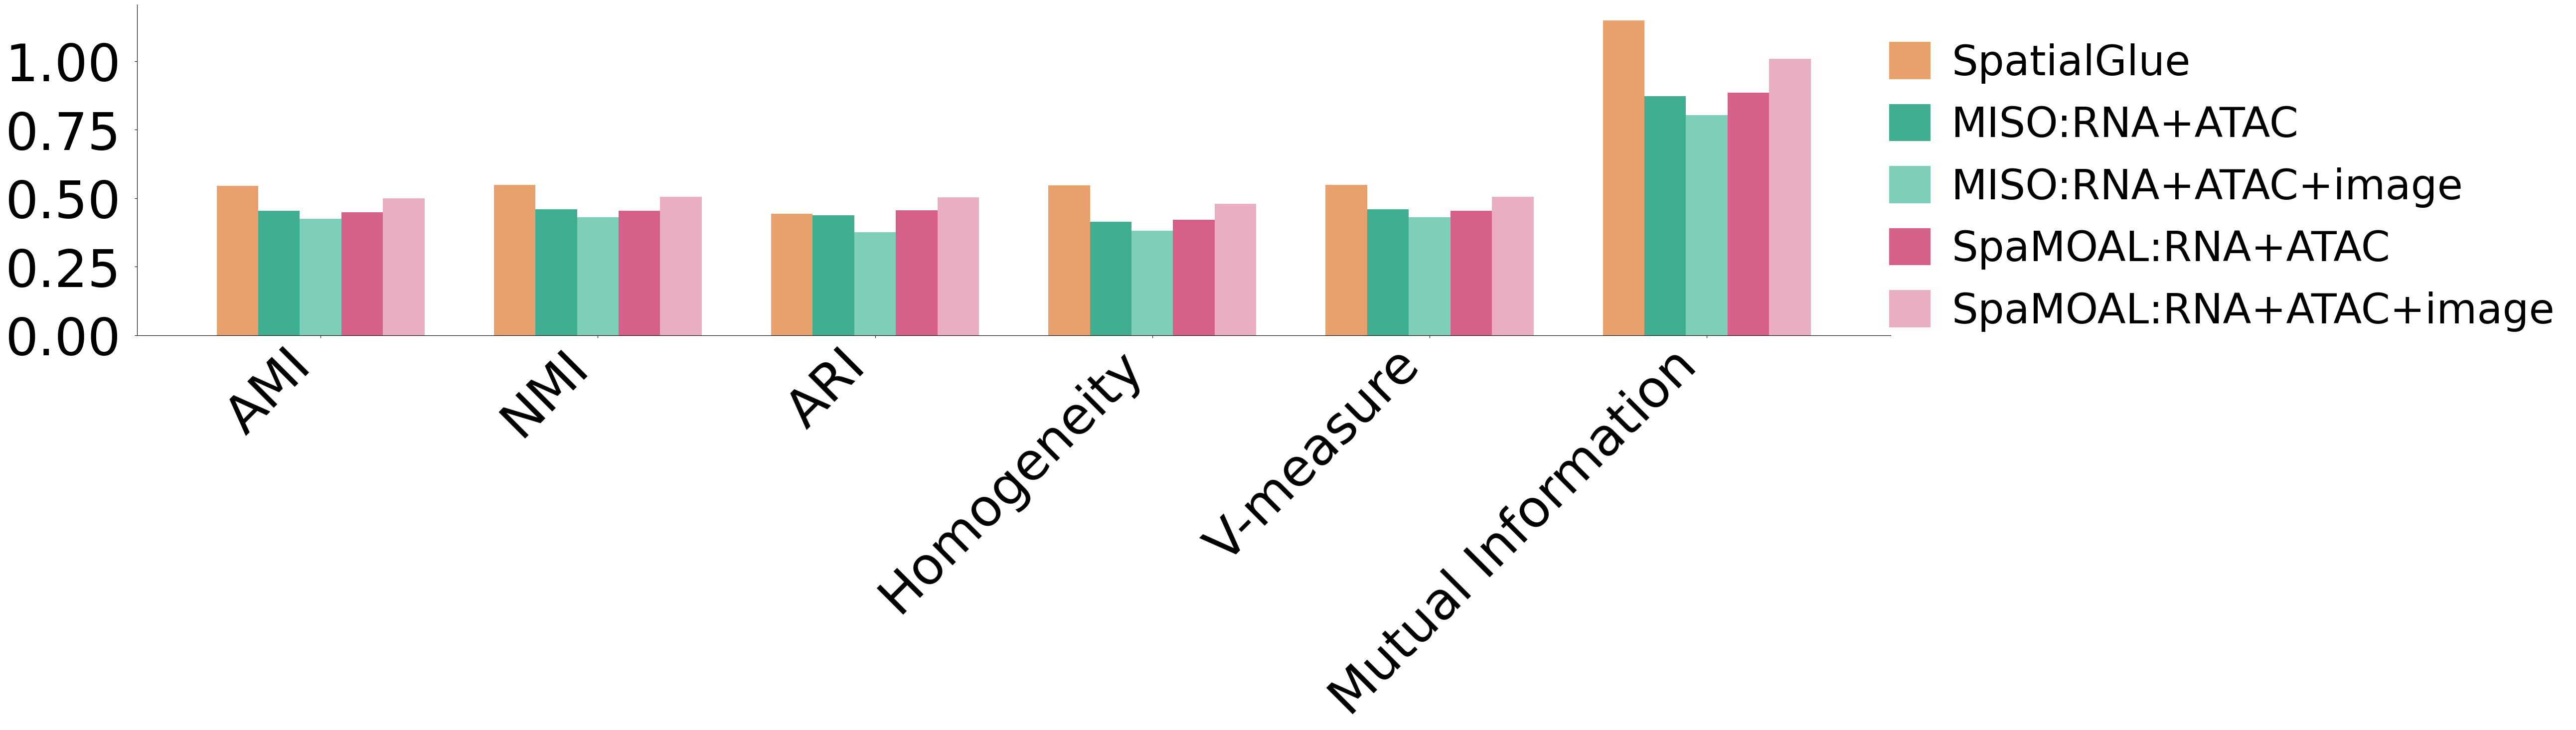

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'SpaMOAL:RNA+ATAC','SpaMOAL:RNA+ATAC+image']
data = {
    'SpatialGlue': [0.5449,	0.5496,	0.4438,	0.5464,	0.5496,	1.1499],
    'MISO:RNA+ATAC': [0.4550,	0.4604,	0.4371,	0.4148,	0.4604,	0.8729],
    'MISO:RNA+ATAC+image':[0.4247,	0.4313,	0.3751,	0.3822,	0.4313,	0.8044],
    'SpaMOAL:RNA+ATAC': [0.4479,	0.4541,	0.4556,	0.4208,	0.4541,	0.8856],
    'SpaMOAL:RNA+ATAC+image':[0.5005,	0.5059,	0.5030,	0.4798,	0.5059,	1.0097]
}
# 设置图形大小
fig, ax = plt.subplots(figsize=(55, 15))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#7dcfb9', '#D6608A',"#eaaec3"]

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=60, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()


ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=75,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=75)
ax.tick_params(axis='y', pad=20)


# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/metrics_default.png', format='png')

plt.show()

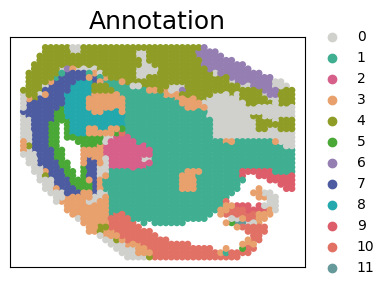

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

# 创建单个子图
fig, ax = plt.subplots(1, 1, figsize=(4, 3))  # 调整图的大小
s_size = 100  # 点的大小

# 绘制空间分布图
sc.pl.embedding(
    adata, 
    basis='spatial', 
    color='annotation', 
    title='Annotation', 
    ax=ax, 
    s=s_size, 
    show=False
)

# 设置标题字体大小
ax.set_title(ax.get_title(), fontsize=18)

# 隐藏坐标轴
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 反转Y轴（如果需要）
ax.invert_yaxis()

# 调整布局
plt.tight_layout()

# 保存图像
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/'
plt.savefig(file_fold + 'cluster_annotation.png', format='png', dpi=300)

# 显示图像
plt.show()

In [18]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad')
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}

# 遍历聚类结果列
for i in range(6, 12):
    predicted_labels = adata.obs[f'SpatialGlue_{i}'].values  # 获取聚类结果
    
    # 计算各项指标
    ami = AMI(true_labels, predicted_labels)
    nmi = NMI(true_labels, predicted_labels)
    ari = ARI(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    mutual_info = mutual_info_score(true_labels, predicted_labels)
    
    # 将结果存储到字典中
    metrics_results[f'SpatialGlue_{i}'] = {
        'AMI': ami,
        'NMI': nmi,
        'ARI': ari,
        'Homogeneity': homogeneity,
        'V-measure': v_measure,
        'Mutual Information': mutual_info
    }

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},", end=" ")
    print()  # 打印一个空行以分隔不同的聚类结果

0.5368, 0.5404, 0.5307, 0.4834, 0.5404, 0.9927, 
0.5166, 0.5209, 0.4314, 0.4888, 0.5209, 1.0036, 
0.5304, 0.5351, 0.3908, 0.5195, 0.5351, 1.0668, 
0.5326, 0.5379, 0.4505, 0.5247, 0.5379, 1.0774, 
0.5436, 0.5493, 0.4592, 0.5533, 0.5493, 1.1361, 
0.5492, 0.5554, 0.4666, 0.5669, 0.5554, 1.1641, 


In [14]:

import re

# 你的文本数据
data = """
{'AMI': 0.45301955707820357, 'NMI': 0.4572218690566039, 'ARI': 0.41230184641185624, 'Homogeneity': 0.3839801667367202, 'V-measure': 0.4572218690566039, 'Mutual Information': 0.808081705777858}
{'AMI': 0.4344895300854016, 'NMI': 0.439424287856758, 'ARI': 0.43547296824772985, 'Homogeneity': 0.3890252657269424, 'V-measure': 0.43942428785675797, 'Mutual Information': 0.8186990567532594}
{'AMI': 0.4360668944234951, 'NMI': 0.44173312318899344, 'ARI': 0.43813902774904734, 'Homogeneity': 0.3983484085313053, 'V-measure': 0.4417331231889934, 'Mutual Information': 0.8383195001855}
{'AMI': 0.44786383887869236, 'NMI': 0.4540508489244964, 'ARI': 0.4556370073686416, 'Homogeneity': 0.4208262714151853, 'V-measure': 0.4540508489244964, 'Mutual Information': 0.8856238959719127}
{'AMI': 0.45139372617299756, 'NMI': 0.45811803131939055, 'ARI': 0.42896709652727943, 'Homogeneity': 0.4374584281532047, 'V-measure': 0.45811803131939055, 'Mutual Information': 0.9206260725214082}
{'AMI': 0.46443005715126645, 'NMI': 0.4714565108855369, 'ARI': 0.447543704479271, 'Homogeneity': 0.467214652520993, 'V-measure': 0.4714565108855369, 'Mutual Information': 0.9832476937082077}

{'AMI': 0.4494870541849288, 'NMI': 0.4534574442717862, 'ARI': 0.43491891963981033, 'Homogeneity': 0.39953922921119595, 'V-measure': 0.45345744427178614, 'Mutual Information': 0.8408255681797393}
{'AMI': 0.4218886932220928, 'NMI': 0.4267743567260775, 'ARI': 0.4333221721210646, 'Homogeneity': 0.38758000023770506, 'V-measure': 0.4267743567260775, 'Mutual Information': 0.8156575126762041}
{'AMI': 0.4461526464932957, 'NMI': 0.4515589550585158, 'ARI': 0.4368596749754704, 'Homogeneity': 0.4173962424613223, 'V-measure': 0.4515589550585158, 'Mutual Information': 0.8784054407286096}
{'AMI': 0.5004879360568331, 'NMI': 0.5059407318510066, 'ARI': 0.502965849140276, 'Homogeneity': 0.47978108856211343, 'V-measure': 0.5059407318510066, 'Mutual Information': 1.0096936092823308}
{'AMI': 0.4962011314935257, 'NMI': 0.502200718547195, 'ARI': 0.5055733689951493, 'Homogeneity': 0.4920725416911905, 'V-measure': 0.502200718547195, 'Mutual Information': 1.0355608265801541}
{'AMI': 0.48582186842664293, 'NMI': 0.4925227526674708, 'ARI': 0.5026847825695273, 'Homogeneity': 0.49153972455180145, 'V-measure': 0.4925227526674708, 'Mutual Information': 1.034439519231068}

"""

# 使用正则表达式找到所有大括号内的数字
numbers = re.findall(r"{(.*?)}", data)

# 处理找到的字符串，将它们分割并转换为浮点数
extracted_numbers = []
for number_group in numbers:
    # 分割每个数字字符串，并将它们转换为浮点数
    numbers_list = [float(num.split(":")[1].strip()) for num in number_group.split(", ") if num]
    extracted_numbers.append(numbers_list)

# 打印提取的数字
for numbers in extracted_numbers:
    print(", ".join(map(str, numbers)) + ",")


0.45301955707820357, 0.4572218690566039, 0.41230184641185624, 0.3839801667367202, 0.4572218690566039, 0.808081705777858,
0.4344895300854016, 0.439424287856758, 0.43547296824772985, 0.3890252657269424, 0.43942428785675797, 0.8186990567532594,
0.4360668944234951, 0.44173312318899344, 0.43813902774904734, 0.3983484085313053, 0.4417331231889934, 0.8383195001855,
0.44786383887869236, 0.4540508489244964, 0.4556370073686416, 0.4208262714151853, 0.4540508489244964, 0.8856238959719127,
0.45139372617299756, 0.45811803131939055, 0.42896709652727943, 0.4374584281532047, 0.45811803131939055, 0.9206260725214082,
0.46443005715126645, 0.4714565108855369, 0.447543704479271, 0.467214652520993, 0.4714565108855369, 0.9832476937082077,
0.4494870541849288, 0.4534574442717862, 0.43491891963981033, 0.39953922921119595, 0.45345744427178614, 0.8408255681797393,
0.4218886932220928, 0.4267743567260775, 0.4333221721210646, 0.38758000023770506, 0.4267743567260775, 0.8156575126762041,
0.4461526464932957, 0.451558955

In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/"
csv_fold=file_fold+'cluster_csv/Seurat/'


cluster_data = pd.read_csv(csv_fold+'wnn_meta_9.csv', index_col=0)
adata.obs['Seurat_9'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_10.csv', index_col=0)
adata.obs['Seurat_10'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_11.csv', index_col=0)
adata.obs['Seurat_11'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_12.csv', index_col=0)
adata.obs['Seurat_12'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_13.csv', index_col=0)
adata.obs['Seurat_13'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_14.csv', index_col=0)
adata.obs['Seurat_14'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_15.csv', index_col=0)
adata.obs['Seurat_15'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'rna_11.csv', index_col=0)
adata.obs['RNA'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'atac_11.csv', index_col=0)
adata.obs['ATAC'] = cluster_data['seurat_clusters'].values


print(adata.obs)
adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E18_5/E18_5_cluster9_15.h5ad')

             Method              Metric     Value
0       SpatialGlue                 AMI  0.536800
1       SpatialGlue                 NMI  0.540400
2       SpatialGlue                 ARI  0.530700
3       SpatialGlue         Homogeneity  0.483400
4       SpatialGlue           V-measure  0.540400
..              ...                 ...       ...
175  RNA+ATAC+image                 NMI  0.492523
176  RNA+ATAC+image                 ARI  0.502685
177  RNA+ATAC+image         Homogeneity  0.491540
178  RNA+ATAC+image           V-measure  0.492523
179  RNA+ATAC+image  Mutual Information  1.034440

[180 rows x 3 columns]


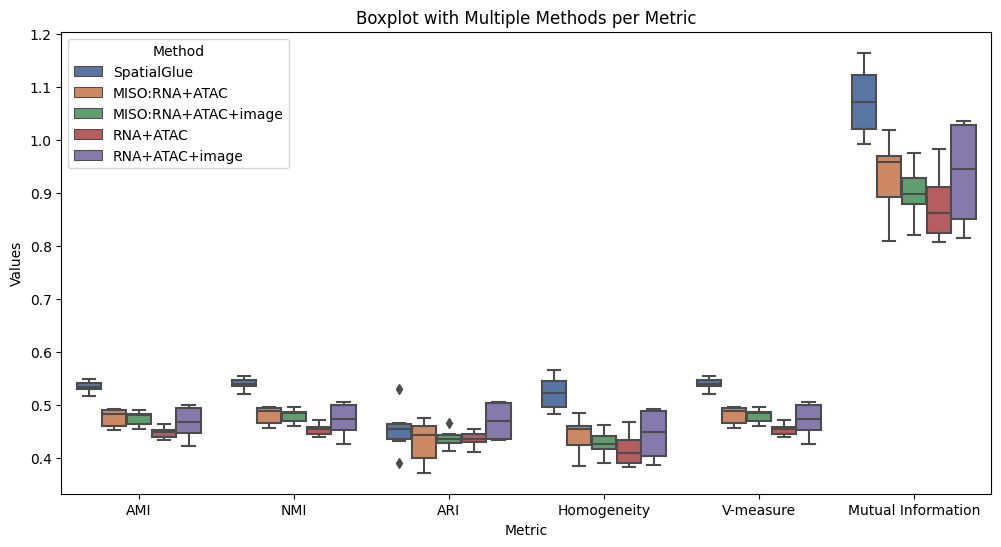

In [ ]:
# E11_0
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建示例数据
np.random.seed(10)


data = {
    'Method': np.repeat(['SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'], 36),
    'Metric': np.tile(['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information'], 30),
    'Value':[
            0.5368, 0.5404, 0.5307, 0.4834, 0.5404, 0.9927, 
            0.5166, 0.5209, 0.4314, 0.4888, 0.5209, 1.0036, 
            0.5304, 0.5351, 0.3908, 0.5195, 0.5351, 1.0668, 
            0.5326, 0.5379, 0.4505, 0.5247, 0.5379, 1.0774, 
            0.5436, 0.5493, 0.4592, 0.5533, 0.5493, 1.1361, 
            0.5492, 0.5554, 0.4666, 0.5669, 0.5554, 1.1641,

            0.4525, 0.4561, 0.3887, 0.3849, 0.4561, 0.8099, 
            0.4923, 0.4965, 0.4756, 0.4586, 0.4965, 0.9652, 
            0.4882, 0.4928, 0.4506, 0.4522, 0.4928, 0.9517, 
            0.4550, 0.4604, 0.4371, 0.4148, 0.4604, 0.8729, 
            0.4902, 0.4957, 0.4636, 0.4619, 0.4957, 0.9720, 
            0.4792, 0.4855, 0.3724, 0.4841, 0.4855, 1.0188,

            0.4813, 0.4852, 0.4278, 0.4160, 0.4852, 0.8754, 
            0.4836, 0.4882, 0.4304, 0.4229, 0.4882, 0.8900, 
            0.4603, 0.4656, 0.4139, 0.3899, 0.4656, 0.8205, 
            0.4797, 0.4851, 0.4400, 0.4449, 0.4851, 0.9364, 
            0.4905, 0.4964, 0.4665, 0.4630, 0.4964, 0.9743, 
            0.4541, 0.4612, 0.4447, 0.4297, 0.4612, 0.9044,
        
            0.45301955707820357, 0.4572218690566039, 0.41230184641185624, 0.3839801667367202, 0.4572218690566039, 0.808081705777858,
            0.4344895300854016, 0.439424287856758, 0.43547296824772985, 0.3890252657269424, 0.43942428785675797, 0.8186990567532594,
            0.4360668944234951, 0.44173312318899344, 0.43813902774904734, 0.3983484085313053, 0.4417331231889934, 0.8383195001855,
            0.44786383887869236, 0.4540508489244964, 0.4556370073686416, 0.4208262714151853, 0.4540508489244964, 0.8856238959719127,
            0.45139372617299756, 0.45811803131939055, 0.42896709652727943, 0.4374584281532047, 0.45811803131939055, 0.9206260725214082,
            0.46443005715126645, 0.4714565108855369, 0.447543704479271, 0.467214652520993, 0.4714565108855369, 0.9832476937082077,


            0.4494870541849288, 0.4534574442717862, 0.43491891963981033, 0.39953922921119595, 0.45345744427178614, 0.8408255681797393,
            0.4218886932220928, 0.4267743567260775, 0.4333221721210646, 0.38758000023770506, 0.4267743567260775, 0.8156575126762041,
            0.4461526464932957, 0.4515589550585158, 0.4368596749754704, 0.4173962424613223, 0.4515589550585158, 0.8784054407286096,
            0.5004879360568331, 0.5059407318510066, 0.502965849140276, 0.47978108856211343, 0.5059407318510066, 1.0096936092823308,
            0.4962011314935257, 0.502200718547195, 0.5055733689951493, 0.4920725416911905, 0.502200718547195, 1.0355608265801541,
            0.48582186842664293, 0.4925227526674708, 0.5026847825695273, 0.49153972455180145, 0.4925227526674708, 1.034439519231068,
           
            ]
          
            
}

# 将数据转换为Pandas DataFrame
df = pd.DataFrame(data)
print(df)

# 画箱线图，每个指标都有多个方法的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', hue='Method', data=df, palette='deep')
plt.title('Boxplot with Multiple Methods per Metric')
plt.ylabel('Values')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

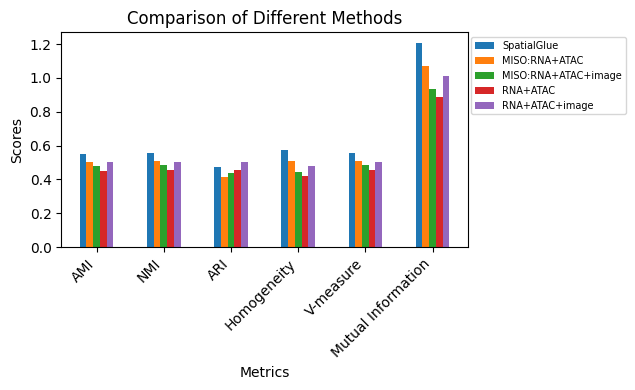

In [21]:

import matplotlib.pyplot as plt
import numpy as np



# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue','MISO:RNA+ATAC','MISO:RNA+ATAC+image','RNA+ATAC','RNA+ATAC+image']
data = {
    'Seurat':[0.5019,0.5071,0.4292,0.5021,0.5071,1.0566],
    'SpatialGlue':[0.5516,0.5573,0.4713,0.5743,0.5573,1.2086],
    'MISO:RNA+ATAC':[ 0.5004, 0.5066, 0.4139, 0.5080, 0.5066, 1.0692],
    'MISO:RNA+ATAC+image':[0.4797, 0.4851, 0.4400, 0.4449, 0.4851, 0.9364],
    'RNA+ATAC':[0.44786383887869236, 0.4540508489244964, 0.4556370073686416, 0.4208262714151853, 0.4540508489244964, 0.8856238959719127],
    'RNA+ATAC+image':[0.5004879360568331, 0.5059407318510066, 0.502965849140276, 0.47978108856211343, 0.5059407318510066, 1.0096936092823308],
    'default':[0.479426430032532,0.4867842040754678, 0.49262827167809925, 0.49176670433772995, 0.4867842040754678, 1.0349171954979153]
    
    }

# 设置图形大小
fig, ax = plt.subplots(figsize=(7, 4))

# 设置条形宽度
bar_width = 0.1
index = np.arange(len(labels))

# 绘制条形图
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method)

# 添加标签和标题
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Methods')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=7)

# 显示图形
plt.tight_layout()
#plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/metrics.png', format='png')  # 修改路径和文件名
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E18_5/metrics_default.png', format='png')  # 修改路径和文件名

plt.show()



